<span style="font-size: 34px;">ROUND-ROBIN SCHEDULING</span>

In [1]:
import matplotlib.pyplot as plt

In [2]:
processes = [
    {'process_id': 'A', 'arrival_time': 0, 'burst_time': 8, 'priority': 2},
    {'process_id': 'B', 'arrival_time': 3, 'burst_time': 4, 'priority': 1},
    {'process_id': 'C', 'arrival_time': 4, 'burst_time': 5, 'priority': 3},
    {'process_id': 'D', 'arrival_time': 6, 'burst_time': 3, 'priority': 2},
    {'process_id': 'E', 'arrival_time': 10, 'burst_time': 2, 'priority': 1}
]


In [3]:
def round_robin_scheduling(processes, time_quantum):
    processes.sort(key=lambda x: x['arrival_time'])

    ready_queue = []
    current_time = 0
    completed_processes = []

    while processes or ready_queue:
        # Add processes to ready queue if they have arrived
        for process in processes:
            if process['arrival_time'] <= current_time:
                ready_queue.append(process)
                processes.remove(process)

        # If ready queue is not empty, select the next process
        if ready_queue:
            current_process = ready_queue.pop(0)

            # Execute the process for the time quantum
            if current_process['burst_time'] > time_quantum:
                current_process['burst_time'] -= time_quantum
                current_time += time_quantum
                ready_queue.append(current_process)
            else:
                current_time += current_process['burst_time']
                current_process['waiting_time'] = current_time - current_process['arrival_time'] - current_process['burst_time']
                current_process['turnaround_time'] = current_time - current_process['arrival_time']
                completed_processes.append(current_process)

    # Calculate average waiting time and turnaround time
    waiting_time = sum(process['waiting_time'] for process in completed_processes)
    turnaround_time = sum(process['turnaround_time'] for process in completed_processes)
    avg_waiting_time = waiting_time / len(completed_processes)
    avg_turnaround_time = turnaround_time / len(completed_processes)

    return completed_processes, avg_waiting_time, avg_turnaround_time

<span style="font-size: 34px;">Gantt Chart Prettier</span>

In [4]:
def display_gantt_chart(processes):
    process_ids = [process['process_id'] for process in processes]
    arrival_times = [process['arrival_time'] for process in processes]
    burst_times = [process['burst_time'] for process in processes]
    completion_times = [arrival_time + burst_time for arrival_time, burst_time in zip(arrival_times, burst_times)]

    # to make it colorful
    norm = plt.Normalize(min(completion_times), max(completion_times))
    cmap = plt.cm.get_cmap('summer')  
    colors = [cmap(norm(completion_time)) for completion_time in completion_times]

    plt.figure(figsize=(10, 5))
    plt.barh(process_ids, burst_times, left=arrival_times, color=colors, linewidth=2)  # left is arrival_time, width is burst_time
    plt.xlabel('Time')
    plt.ylabel('Process')
    plt.title('Round Robin Scheduling Gantt Chart')
    plt.grid(True)
    plt.show()

In [5]:
time_quantum = 2

In [6]:
scheduled_processes, avg_waiting_time, avg_turnaround_time = round_robin_scheduling(processes, time_quantum)

In [7]:
print("Process ID\tArrival Time\tBurst Time\tPriority\tWaiting Time\tTurnaround Time")
for process in scheduled_processes:
    print(f"{process['process_id']}\t\t{process['arrival_time']}\t\t{process['burst_time']}\t\t{process['priority']}\t\t{process['waiting_time']}\t\t{process['turnaround_time']}")
print(f"Average Waiting Time: {avg_waiting_time:.2f}")
print(f"Average Turnaround Time: {avg_turnaround_time:.2f}")

Process ID	Arrival Time	Burst Time	Priority	Waiting Time	Turnaround Time
A		0		2		2		8		10
B		3		2		1		9		11
E		10		2		1		6		8
D		6		1		2		14		15
C		4		1		3		17		18
Average Waiting Time: 10.80
Average Turnaround Time: 12.40


C:\Users\USER\AppData\Local\Temp\ipykernel_5900\1593899080.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('summer')


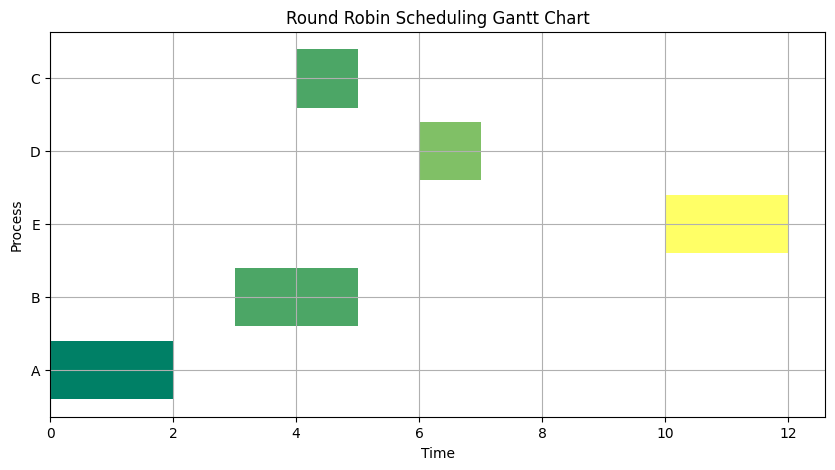

In [8]:
display_gantt_chart(scheduled_processes)